In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics

In [2]:
# Creat DataFrame
guj_BJP_urban_SR = pd.read_csv (r"D:\Dropbox\TASK FORCE\Data Analysis Lok Sabha & Vidhan Sabha\GUJARAT ELECTIONS\BJP_StrikeRate_Urban_2017.csv")
guj_SR = guj_BJP_urban_SR
guj_SR = guj_SR[guj_SR.URBAN >= 0]
guj_SR = guj_SR[guj_SR.URBAN <= 100]
guj_SR['URBAN'] = (guj_SR['URBAN'] / 100).round(2)
guj_SR = guj_SR.reset_index()
guj_SR = guj_SR[["BJP_URBAN_SR", "URBAN"]]
# Create X from the "URBAN" values of dataframe guj_SR
X_train = guj_SR["URBAN"].values
# Create y from the "BJP_URBAN_SR" values of dataframe guj_SR
y_train = guj_SR["BJP_URBAN_SR"].values
X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train.shape)
print(type(X_train))

# Reshape X
# Reshape is rquire dor x only in sklearn by x_train = x_train.reshape(-1,1)
X_train = X_train.reshape(-1,1)
# Check the shape of the features and targets
print(X_train.shape, y_train.shape)


(182,)
<class 'numpy.ndarray'>
(182, 1) (182,)


## COMPUTE COST FUNCTION- STEP 1

In [3]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
 
  
    for i in range(m):
        f_wb = w * x[i] + b
        error = f_wb - y[i]
        cost = cost + error**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

## COMPUTE GRADIENT FUNCTION- STEP 2

In [4]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    
    m, n = x.shape    # Number of training examples
    dj_dw = 0         # Starting of the list dj_dw is 0
    dj_db = 0         # Starting of the list dj_db is 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

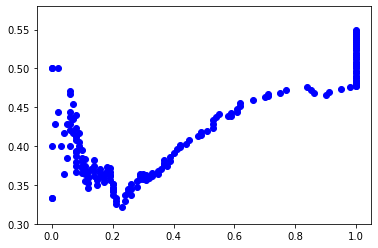

In [5]:
plt.scatter(X_train,y_train, color="blue")
plt.ylim([0.3, 0.58])
plt.show()

## GRADIENT DESCENT- STEP 3

<a name="toc_40291_2.5"></a>
###  Gradient Descent - Implementing equation by utilizing 'compute_gradient' and 'compute_cost'


In [6]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
   
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 :
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [7]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 100000
tmp_alpha = .001
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(X_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(w_final, b_final)

Iteration    0: Cost     0.09   
Iteration 10000: Cost     0.00   
Iteration 20000: Cost     0.00   
Iteration 30000: Cost     0.00   
Iteration 40000: Cost     0.00   
Iteration 50000: Cost     0.00   
Iteration 60000: Cost     0.00   
Iteration 70000: Cost     0.00   
Iteration 80000: Cost     0.00   
Iteration 90000: Cost     0.00   
[0.13905491] [0.35555456]


## CALCULATE w AND b USING sklearn- Both the intercept and coefficients match with the above calculations

In [8]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#X must be a 2-D Matrix
linear_model.fit(X_train.reshape(-1, 1), y_train)

b = linear_model.intercept_
w = linear_model.coef_
print(f"w = {w:}")
print(f"b = {b:0.3f}")

w = [0.13905436]
b = 0.356


## USING sklearn TRAIN, TEST AND CHECK SCORE

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# get the data and prepare
guj_BJP_urban_SR = pd.read_csv (r"D:\Dropbox\TASK FORCE\Data Analysis Lok Sabha & Vidhan Sabha\GUJARAT ELECTIONS\BJP_StrikeRate_Urban_2017.csv")
guj_SR = guj_BJP_urban_SR
guj_SR = guj_SR[guj_SR.URBAN >= 0]
guj_SR = guj_SR[guj_SR.URBAN <= 100]
guj_SR['URBAN'] = (guj_SR['URBAN'] / 100).round(2)
guj_SR = guj_SR.reset_index()
guj_SR = guj_SR[["BJP_URBAN_SR", "URBAN"]]

# Create X and y arrays
X_guj_SR = guj_SR["URBAN"].values
y_guj_SR = guj_SR["BJP_URBAN_SR"].values
X_guj_SR = X_guj_SR.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_guj_SR, y_guj_SR, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train,y_train)

# Make predictions
yHat = reg.predict(X_test)
yHat_all = reg.predict(X_guj_SR)
print("Predictions: {}, Actual Values: {}".format(yHat[:3], y_test[:3]))

Predictions: [0.36394006 0.36962408 0.49751458], Actual Values: [0.4        0.37209302 0.47741935]


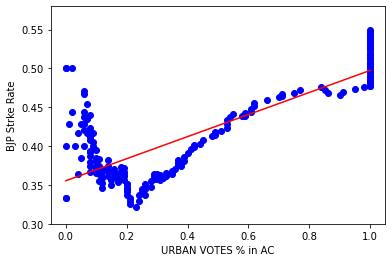

In [10]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X_guj_SR, y_guj_SR, color="blue")

# Create line plot
plt.plot(X_guj_SR, yHat_all, color="red")
plt.xlabel("URBAN VOTES % in AC")
plt.ylabel("BJP Strke Rate")
plt.ylim([0.3, 0.58])
# Display the plot
plt.show()

In [11]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, yHat, squared = False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.618042792537077
RMSE: 0.03172601339828331


## PERFORM k-fold CROSS-VALIDATION ON guj_SR DATA USING sklearn

In [12]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X_guj_SR, y_guj_SR, cv = kf)
print(cv_results)
print(np.mean(cv_results), np.std(cv_results))
print(np.quantile(cv_results, [0.025, 0.975]))

[0.57417779 0.59373461 0.43694698 0.40928123 0.57900019]
0.5186281600001251 0.07874018974305423
[0.41204781 0.59226116]


# GUJARAT BJP STRIKE RATE WITH POLYNOMIAL AND REGULARISED LINEAR REGRESSION

### Step1 import the numpy, pandas, math and other packages

### Step 2 import the csv or excel sheet

### Step 3 in case of logistic regression define sigmoid function first

### Step 4 feature mapping by polynomial function

### Step 5 normalisation of features in case of multiple features of different scales by using z score method

### Step 6 compute_cost (logistic) or compute_cost  (linear) and add  regularisation cost function

### Step 7 compute_gradient (linear) or compute_gradient (logistic) with regularisation cost

### Step 8 compute_gradient_descent

### Step 9 Calculate w and b by implementing the gradient_descent function

### Step 10 Predict accuracy for logistic regression

In [15]:
# Step1 import the numpy, pandas, math and other packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics

In [16]:
# Step 2 Creat DataFrame

guj_SR = pd.read_csv (r"D:\Dropbox\TASK FORCE\Data Analysis Lok Sabha & Vidhan Sabha\GUJARAT ELECTIONS\BJP_StrikeRate_Urban_2017.csv")

# Select the range of Urban Votes
guj_SR = guj_SR[guj_SR.URBAN >= 0]
guj_SR = guj_SR[guj_SR.URBAN <= 100]

# Scale the percentage to proportion of urban votes
guj_SR['URBAN'] = (guj_SR['URBAN'] / 100).round(2)

# Reset the index and select only the required columns
guj_SR = guj_SR.reset_index()
guj_SR = guj_SR[["BJP_URBAN_SR", "URBAN"]]

# ADD NEW FEATURE X^2-IMPORTANT
guj_SR['URBAN^2'] = guj_SR['URBAN']**2



# Create X_train from the "URBAN" values of dataframe guj_SR
X_train = guj_SR.drop("BJP_URBAN_SR", axis = 1).values
# Create y_train from the "BJP_URBAN_SR" values of dataframe guj_SR
y_train = guj_SR["BJP_URBAN_SR"].values
print("guj_SR type:  " + str(type(guj_SR)))


guj_SR = np.array(guj_SR)

print("guj_SR type:  " + str(type(guj_SR)) + "  X_train shape:  " + str(X_train.shape))


# Reshape X
# Check shape of X it should be two dimensional otherwise, reshape is rquired for x 
# only in sklearn by x_train = x_train.reshape(-1,1)

# Check the shape of the features and targets
print(X_train.shape, y_train.shape)
print("guj_SR type:  " + str(type(guj_SR)))

guj_SR type:  <class 'pandas.core.frame.DataFrame'>
guj_SR type:  <class 'numpy.ndarray'>  X_train shape:  (182, 2)
(182, 2) (182,)
guj_SR type:  <class 'numpy.ndarray'>


In [17]:
# Step 4 feature mapping by polynomial function
# Step 6 compute_cost (logistic) or compute_cost (linear) and add regularisation cost function

def compute_cost(X, y, w, b, lambda_ = 10) :
    """
    to calculate the cost with regularisation and polynomial function
    
    f_wb = y_hat = w_ij*X_ij + b # Here i is from range m and j is from range n (number of features)
    J_wb is total cost i.e summation of all f_wb
    """
    
    m, n = X.shape
   
    cost = 0
    
    for i in range(m) :
        f_wb = 0 # initial value 0 
        for j in range(n) :
            f_wb_ij = np.dot(X[i][j], w[j])
            f_wb += f_wb_ij
        
        f_wb += b
        error = f_wb - y[i]
            
        cost += error**2
    total_cost = 1 / (2 * m) * cost
    return total_cost

In [18]:
def compute_cost_reg(X, y, w, b, lambda_ = 10):
    """
    Add regularisation cost lambda_/2m *(w[j]^2)
    """
    
    m, n = X.shape
    # Calls the compute_cost function that you implemented above
    cost_without_reg = compute_cost(X, y, w, b) 
    
    reg_cost = 0
    
    for j in range(n) :
        reg_cost_j = w[j]**2
        reg_cost += reg_cost_j
        
    total_cost = cost_without_reg + (lambda_/(2 * m)) * reg_cost
    
    return total_cost

In [19]:
# Step 7 compute_gradient (linear) or compute_gradient (logistic) with regularisation cost

def compute_gradient(X, y, w, b, lambda_ = 10) :
    """
     Computes the gradient
    Args:
      X : (ndarray Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,1)) actual value 
      w : (array_like Shape (n,1)) values of parameters of the model      
      b : (scalar)                 value of parameter of the model 
      lambda_: unused placeholder.
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b.  
    
    """
    
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.0
    
    
    for i in range(m) :
        f_wb = 0
        
        for j in range(n) :
            f_wb_ij = np.dot(X[i, j], w[j])
            f_wb += f_wb_ij
            
        f_wb += b
        
        error = f_wb - y[i]
        dj_db += error
        
        
        for j in range(n) :
            dj_dw[j] += error * X[i][j]
        
        
        dj_dw = dj_dw / m
        dj_db = dj_db / m
        
        
    return dj_db, dj_dw

In [20]:
# Add regularisation

def compute_gradient_reg(X, y, w, b, lambda_ = 10): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X : (ndarray Shape (m,n))   variable such as house size 
      y : (ndarray Shape (m,))    actual value 
      w : (ndarray Shape (n,))    values of parameters of the model      
      b : (scalar)                value of parameter of the model  
      lambda_ : (scalar,float)    regularization constant
    Returns
      dj_db: (scalar)             The gradient of the cost w.r.t. the parameter b. 
      dj_dw: (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 

    """
    m, n = X.shape
    
    dj_db, dj_dw = compute_gradient(X, y, w, b)

    ### START CODE HERE ###     
    for j in range(n) :
        dj_dw_j_reg = (lambda_/m) * w[j]
        dj_dw[j] = dj_dw[j] + dj_dw_j_reg
        
    ### END CODE HERE ###         
        
    return dj_db, dj_dw

In [21]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_ = 10): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (array_like Shape (m, n)
      y :    (array_like Shape (m,))
      w_in : (array_like Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)                 Initial value of parameter of the model
      cost_function:                  function to compute cost
      alpha : (float)                 Learning rate
      num_iters : (int)               number of iterations to run gradient descent
      lambda_ (scalar, float)         regularization constant
      
    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [22]:
# Initialize fitting parameters
np.random.seed(1)
initial_w = np.random.rand(X_train.shape[1])-0.5
initial_b = 1.

# Set regularization parameter lambda_ to 1 (you can try varying this)
lambda_ = 1;                                          
# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train, y_train, initial_w, initial_b, 
                                    compute_cost_reg, compute_gradient_reg, 
                                    alpha, iterations, lambda_)

print(w,b)

Iteration    0: Cost     0.19   
Iteration 1000: Cost     0.19   
Iteration 2000: Cost     0.19   
Iteration 3000: Cost     0.18   
Iteration 4000: Cost     0.18   
Iteration 5000: Cost     0.18   
Iteration 6000: Cost     0.17   
Iteration 7000: Cost     0.17   
Iteration 8000: Cost     0.17   
Iteration 9000: Cost     0.16   
Iteration 9999: Cost     0.16   
[-0.10748377  0.17960326] 0.9702316496451251


In [23]:
# lambda = 1
y_hat = np.dot(X_train, w) + b
y_hat = y_hat**1/2

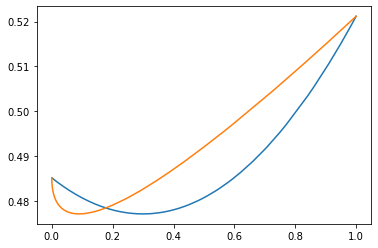

In [24]:
plt.plot(X_train, y_hat)